# Customer Churn in Telecom Companies
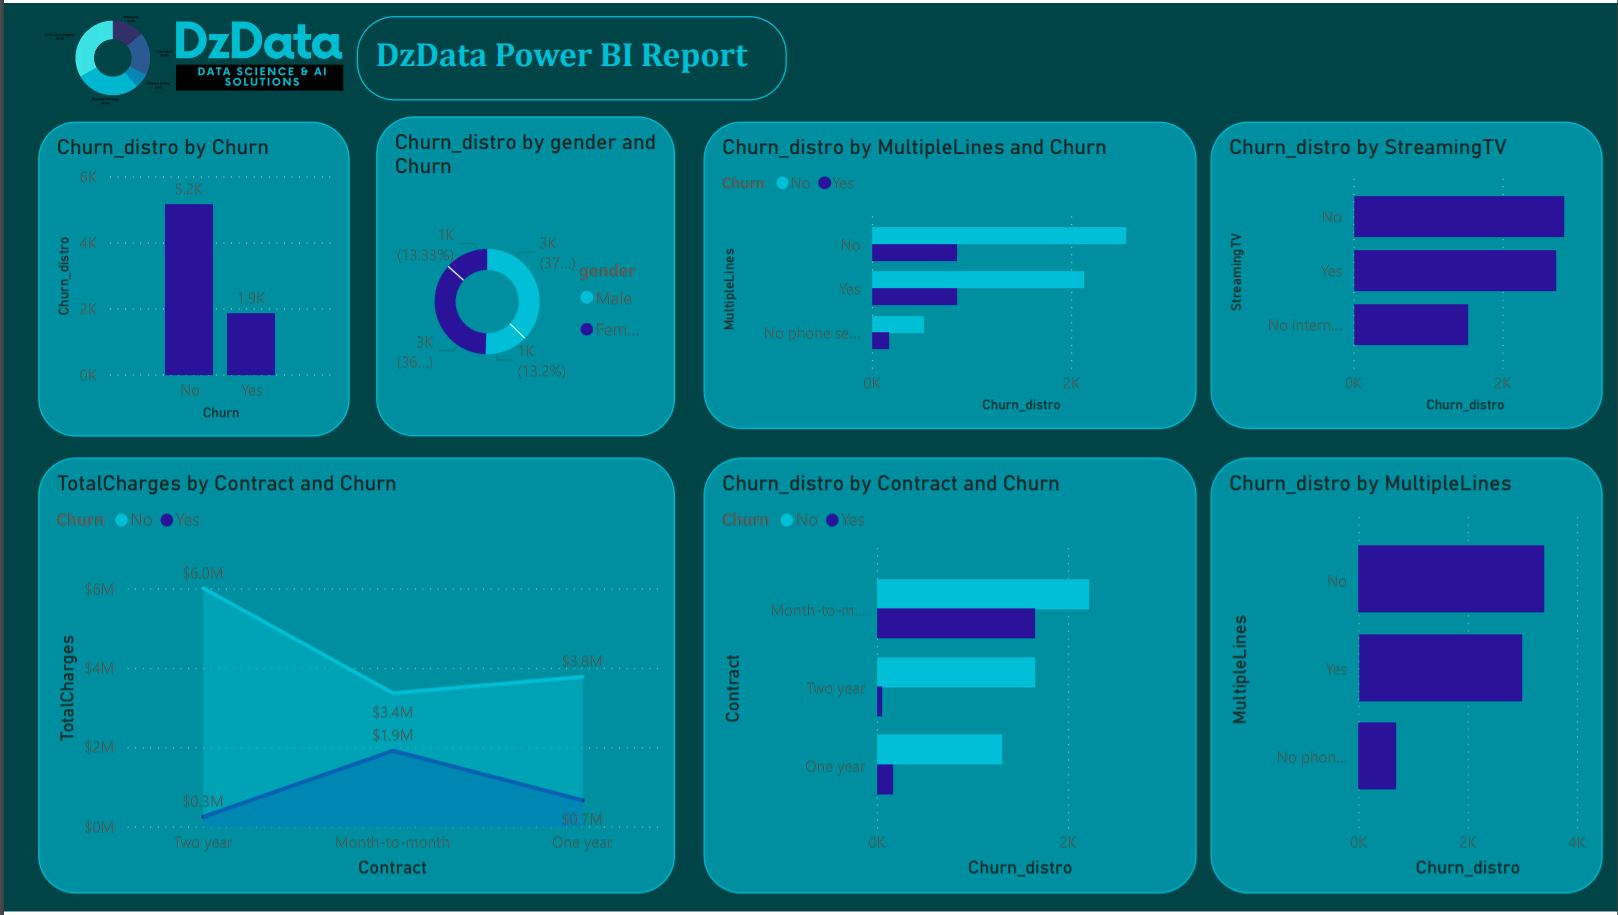

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float', '{:.4f}'.format)

In [ ]:
data = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

# 1. Exploratory Data Analysis (EDA)

In [ ]:
data.describe()

In [ ]:
data.info()

## `customerID`

In [ ]:
data.customerID.nunique()

The `customerID` is unique for each customers and will not be useful to our model.

## `Churn`: Target variable

In [ ]:
data.Churn.value_counts()

In [ ]:
sns.countplot('Churn', data=data)

## `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`
- `gender`: Whether the customer is a male or a female
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0)
- `Partner`: Whether the customer has a partner or not (Yes, No)
- `Dependents`: Whether the customer has dependents or not (Yes, No)
- `PhoneService`: Whether the customer has a ohone service or not (Yes, No)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('gender', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('SeniorCitizen', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot('Partner', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot('Dependents', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot('PhoneService', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('PaperlessBilling', data=data, hue='Churn')

It seems that the gender column doesn't have a big effect on the Chur rate. 
- Churn: 50.73% Males, 49.26% Females
- Not Churn: 50.24% Males, 49.75% Females

The senior citizen are more likely to churn

## `tenure`, `MonthlyCharges`, `TotalCharges`
- `tenure`: The number of months the customer has stayed with the company
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer

In [ ]:
data.tenure.value_counts()

In [ ]:
data.tenure.max()

In [ ]:
data['TotalCharges'] = data.TotalCharges.replace(' ', np.nan)
data['TotalCharges'] = data.TotalCharges.astype(float)

In [ ]:
data.TotalCharges.dtype

In [ ]:
plt.figure(figsize=(14, 14))

plt.subplot(3, 2, 1)
data[data.Churn == 'No'].tenure.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.legend()
plt.xlabel('Number of months with company')

plt.subplot(3, 2, 2)
data[data.Churn == 'No'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].tenure.value_counts().hist(bins=50, alpha=0.6, label='Churn=Yes')
plt.legend()

plt.subplot(3, 2, 3)
data[data.Churn == 'No'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].MonthlyCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Monthly Payment')
plt.legend()

plt.subplot(3, 2, 4)
data[data.Churn == 'No'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=No')
data[data.Churn == 'Yes'].TotalCharges.hist(bins=35, alpha=0.6, label='Churn=Yes')
plt.xlabel('Total Payment')
plt.legend()

## `OnlineSecurity`, `OnlineBackup`, `InternetService`, `MultipleLines`, `DeviceProtection`, `TechSupport`

- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service)
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service)
- `InternetService`: Customer's internet service provider (DSL, Fiber optic, No)
- `MultipleLines`: Whether the customer has Multiple Lines or not (Yes, No, No phone service)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service)
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 2, 1)
sns.countplot('OnlineBackup', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('OnlineSecurity', data=data, hue='Churn')

plt.subplot(3, 2, 3)
sns.countplot('InternetService', data=data, hue='Churn')

plt.subplot(3, 2, 4)
sns.countplot('MultipleLines', data=data, hue='Churn')

plt.subplot(3, 2, 5)
sns.countplot('DeviceProtection', data=data, hue='Churn')

plt.subplot(3, 2, 6)
sns.countplot('TechSupport', data=data, hue='Churn')

## `StreamingMovies`, `StreamingTV`, `PaymentMethod`, `Contract`
- `StreamingMovies`: Whether the customer has streaming movies or not (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
- `PaymentMethod`: The customer's payment method (Electronic check, Mailed check, Bank Transfer (automatic), Credit card (automatic))
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year)

In [ ]:
plt.figure(figsize=(15, 18))

plt.subplot(3, 2, 1)
sns.countplot('StreamingMovies', data=data, hue='Churn')

plt.subplot(3, 2, 2)
sns.countplot('StreamingTV', data=data, hue='Churn')

plt.subplot(3, 2, 3)
g = sns.countplot('PaymentMethod', data=data, hue='Churn')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

plt.subplot(3, 2, 4)
g = sns.countplot('Contract', data=data, hue='Churn')
g.set_xticklabels(g.get_xticklabels(), rotation=45);

# 2. Feature Engineering

## Missing Values

In [ ]:
data.isna().sum()

In [ ]:
data['TotalCharges'] = data.TotalCharges.fillna(value=data.TotalCharges.median())

In [ ]:
data.TotalCharges.median()

## `OnlineSecurity`, `OnlineBackup`, `InternetService`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`

In [ ]:
columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']
for column in columns:
    data[column] = data[column].replace({'No internet service':'No'})

In [ ]:
data.head()

## Binary Columns

In [ ]:
binary_columns = [column for column in data.columns if data[column].nunique() == 2]
len(binary_columns)

In [ ]:
columns = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',  
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'Churn']
for col in columns:
    data[col] = data[col].map({'Yes':1, 'No':0})
    
data['gender'] = data.gender.map({'Male':1, 'Female':0})

In [ ]:
for col in binary_columns:
    print(data[col].unique())

## `customerID`
we are going to drop the customers ID

In [ ]:
customerID = data.customerID
data.drop('customerID', axis=1, inplace=True)

## `tenure`

In [ ]:
def tenure_lab(period) :
    
    if period <= 12 :
        return 1
    elif (period > 12) & (period <= 24 ):
        return 2
    elif (period > 24) & (period <= 36) :
        return 3
    elif (period > 36) & (period <= 48) :
        return 3
    elif (period > 48) & (period <= 60) :
        return 4
    elif period > 60 :
        return 5
    
data['tenure'] = data.tenure.apply(tenure_lab)

In [ ]:
data.tenure.value_counts()

## `MultipleLines`, `InternetService`, `Contract`, `PaymentMethod`
We are going to transfer these columns into dummy variables

In [ ]:
dummy_col = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure']
data_1 = pd.get_dummies(data, columns=dummy_col, drop_first=True, dtype='uint8')

In [ ]:
data_1.head()

## Correlation Analysis

In [ ]:
plt.figure(figsize=(20, 18))
sns.heatmap(data_1.corr(), annot=True)

In [ ]:
data_1.drop('Churn', axis=1).corrwith(data.Churn).plot(kind='barh', figsize=(10, 7))

## Checking for duplicate rows and columns

In [ ]:
print(data_1.shape)

# Remove duplicate Features
data_1 = data_1.T.drop_duplicates()
data_1 = data_1.T

# Remove Duplicate Rows
data_1.drop_duplicates(inplace=True)

print(data_1.shape)

# 3. Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = data_1.drop('Churn', axis=1)
y = data_1.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

# 4. Model Building
## Base line model

We an imbalanced problem here. If we predict that all our customers will not churn, we will have an accuracy of `73.84%`.

In [ ]:
(y_test.value_counts()[0] / y_test.shape)[0]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

## 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(solver='liblinear', penalty='l1')
lr_classifier.fit(X_train_std, y_train)

evaluate(lr_classifier, X_train_std, X_test_std, y_train, y_test)

### Cross Validation Score for Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_classifier, X_std, y, cv=3, scoring='f1')
print(scores)
print(f"Logistic Regression f1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

disp = plot_confusion_matrix(lr_classifier, X_test_std, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

In [ ]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)

## 2. Random Forest Classifier

In [ ]:
stay = (y_train.value_counts()[0] / y_train.shape)[0]
churn = (y_train.value_counts()[1] / y_train.shape)[0]

print(f"Staying Rate: {stay * 100:.2f}%")
print(f"Churning Rate: {churn * 100 :.2f}%")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=1000)
rand_forest.fit(X_train, y_train)

evaluate(rand_forest, X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators=100)

param_grid = {'n_estimators':[550, 600, 650],
              'max_depth':[3, 5, 7, 10, 15, None], 
              'min_samples_split':[2, 3, 10], 
              'min_samples_leaf':[1, 3, 5, 7, 10], 
              'criterion':["gini", "entropy"]}

rf_grid_cv = GridSearchCV(rf_clf, param_grid, scoring="f1", n_jobs=-1, verbose=1, cv=3)
# rf_grid_cv.fit(X_train, y_train)

In [ ]:
# rf_grid_cv.best_estimator_

In [ ]:
rf_clf = RandomForestClassifier(criterion='entropy',
                                max_depth=10,
                                min_samples_leaf=3, 
                                min_samples_split=3,
                                n_estimators=600)

rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

### Cross Validation Score for Random Forest Classifier

In [ ]:
scores = cross_val_score(rf_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"Random Forest F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

In [ ]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

In [ ]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)

## 3. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train_std, y_train)

evaluate(svc, X_train_std, X_test_std, y_train, y_test)

In [ ]:
param_grid = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel':['rbf']
}

grid_cv = GridSearchCV(SVC(), param_grid, verbose=1, cv=5, n_jobs=-1)
# grid_cv.fit(X_train_std, y_train)

In [ ]:
# grid_cv.best_estimator_

In [ ]:
svc = SVC(C=10, gamma=0.01, kernel='rbf')
svc.fit(X_train_std, y_train)
evaluate(svc, X_train_std, X_test_std, y_train, y_test)

### Cross Validation Score for Support Vector Machine

In [ ]:
scores = cross_val_score(svc, X_std, y, cv=3, scoring='f1')
print(scores)
print(f"Support Vector Machine f1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

In [ ]:
disp = plot_confusion_matrix(svc, X_test_std, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

In [ ]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)

## 4. XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

In [ ]:
hyperparameter_grid = {'n_estimators': [75, 90, 100, 125], 
                       'learning_rate' : [0.09, 0.1, 0.2], 
                       'base_score' : [0.15],
                       'colsample_bytree':[0.85, 0.95, 1],
                       'colsample_bylevel':[0.85, 0.95, 1],
                       'colsample_bynode':[0.85, 0.95, 1],
                      }

xgb_clf = XGBClassifier()
xgb_cv = GridSearchCV(estimator=xgb_clf, param_grid=hyperparameter_grid, cv=3, 
                      scoring='f1', n_jobs =-1, verbose=1)

# xgb_cv.fit(X_train, y_train)

In [ ]:
# xgb_cv.best_estimator_

In [ ]:
xgb_clf = XGBClassifier(base_score=0.15, 
                        learning_rate=0.09, 
                        colsample_bylevel=0.85,
                        colsample_bynode=0.85, 
                        colsample_bytree=0.95,
                        n_estimators=100)
xgb_clf.fit(X_train, y_train)
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

### Cross Validation Score For XGBoost

In [ ]:
scores = cross_val_score(xgb_clf, X, y, cv=3, scoring='f1')
print(scores)
print(f"XGBoost F1_score: {scores.mean() * 100:.2f}% +/- ({scores.std() * 100:.2f})")

In [ ]:
disp = plot_confusion_matrix(xgb_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Stay', 'Churn'])

In [ ]:
disp = plot_roc_curve(lr_classifier, X_test_std, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, X_test_std, y_test, ax=disp.ax_)
plot_roc_curve(xgb_clf, X_test, y_test, ax=disp.ax_)

## Feature Importance

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
df = feature_imp(data_1.drop('Churn', axis=1), xgb_clf)
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance according to XGBoost')

In [ ]:
df = feature_imp(data_1.drop('Churn', axis=1), rf_clf)
df.set_index('feature', inplace=True)
df.plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance according to Random Forest')

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(lr_classifier, n_features_to_select=1)
rfe.fit(X_train, y_train)

In [ ]:
rfe_ranking = dict(zip(rfe.ranking_.tolist(), X_train.columns.tolist()))
print(rfe_ranking)